In [26]:
import numpy as np
from matplotlib import pyplot as plt
from py import opt, read, hypergraph
from py.utils import *
from scipy.stats import rankdata

In [2]:
w = np.loadtxt('throughput/contact-high-school/w.txt')
x = np.loadtxt('throughput/contact-high-school/x.txt')
w2 = np.loadtxt('throughput/contact-high-school/w2.txt')

In [4]:
d = np.round(w.sum(axis = 0).astype(int))

In [5]:
n = len(d)
m = np.round(w.sum()/2).astype(int)
b_ = opt.compute_b(d)

round 0, current error = 13333.8657
round 1, current error = 53.805
round 2, current error = 129.0202
round 3, current error = 2.429
round 4, current error = 0.1479
round 5, current error = 0.0135


In [44]:
W_ = W_from_b(b_)
NG = np.outer(d, d) / d.sum()
np.fill_diagonal(NG,0)

In [185]:
def assortativity_coefficient(M, method = 'pearson'):
    
    d = M.sum(axis = 1)
    if method == 'spearman':
        d = rankdata(d)

    m = M/M.sum()
    
    X = d
    if method == 'pearson':
        X = X - np.ones(M.shape)
    else:
        X = np.tile(X, (len(X),1))
    
    cov = ((X*X.T)*m).sum() - ((X*m).sum())**2
    var = ((X**2)*m).sum() - ((X*m).sum())**2
    return(cov/var)


In [186]:
method = 'pearson'
for M in [NG, W_, w]:
    print(assortativity_coefficient(M, method))

-0.01789602084398813
0.31447650447396047
0.31627429629893866


In [187]:
method = 'spearman'
for M in [NG, W_, w]:
    print(assortativity_coefficient(M, method))

-0.006593472843045412
0.1977483576638617
0.19751417643412478


In [188]:
data = 'contact-high-school'
path = data + '/' + data + '-'

t_min = 0

C = read.read_data(data, t_min = t_min)
C = hypergraph.hypergraph(C)
G = hypergraph.projected_graph(C, as_hyper = True)
A = adjacency_matrix(G)

In [189]:
assortativity_coefficient(A, 'pearson'),assortativity_coefficient(A, 'spearman')

(0.463636752314516, 0.414580819744199)

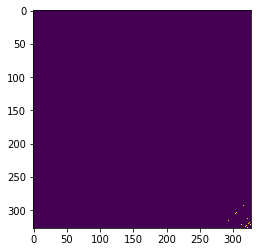

In [184]:
plt.imshow(degree_sort(A>1000, A.sum(axis = 0)))

In [192]:
(d.mean()**2)/d.sum()

0.27545110269547785